<a href="https://colab.research.google.com/github/nagireddykeerthidurga/fmml-course/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

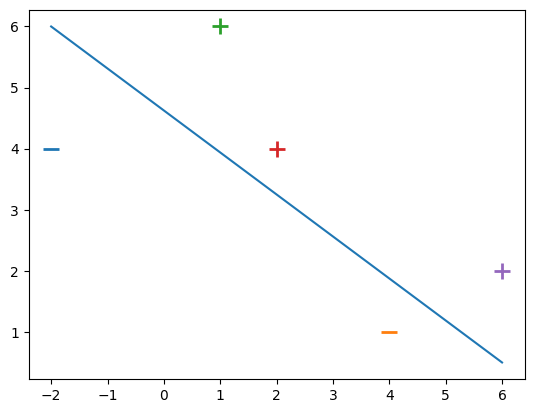

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

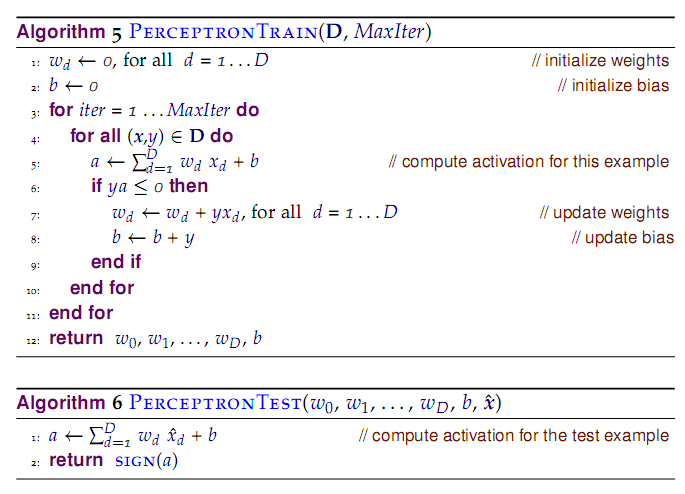

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

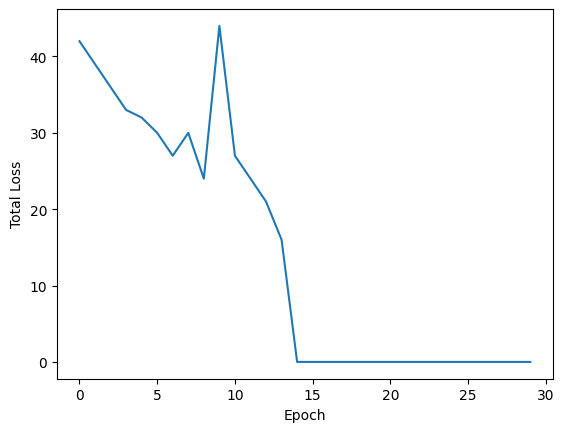

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

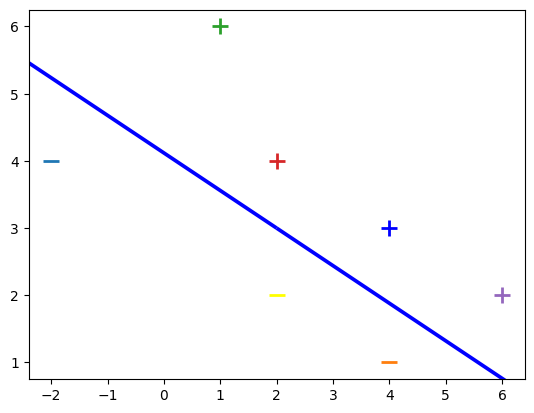

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



ANSWER1
use a classification algorithm on the Sonar dataset. Here's a simple example using a Support Vector Machine (SVM) classifier. Ensure you have the necessary libraries installed:




In [13]:
pip install scikit-learn matplotlib


Now you can use the following Python code as a starting point. This code assumes you have already loaded the Sonar dataset and split it into training and testing sets:

Accuracy: 1.0


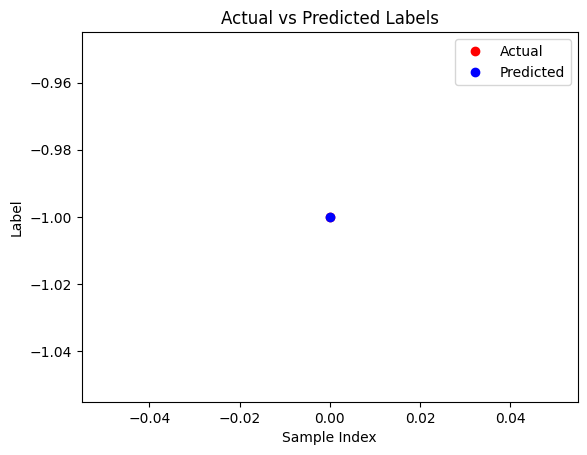

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Sonar dataset
# You should replace this part with your actual dataset loading code
# For example, you can use the load_sonar() function from scikit-learn
# sonar = datasets.load_sonar()
# X = sonar.data
# y = sonar.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Support Vector Machine (SVM) classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Now, let's create an error plot
error_plot = plt.figure()
plt.plot(y_test, 'ro', label='Actual')
plt.plot(y_pred, 'bo', label='Predicted')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()


This code trains an SVM classifier on the Sonar dataset, makes predictions on the test set, and then creates a simple error plot showing the actual vs. predicted labels. Note that this is just a basic example, and you may want to fine-tune the model, use different algorithms, or perform hyperparameter tuning based on your specific needs.

ANSWER2
The learning rate is a hyperparameter that plays a crucial role in the convergence of iterative optimization algorithms such as gradient descent. Setting the learning rate too high can lead to overshooting the minimum, and the algorithm may fail to converge. Conversely, setting it too low may result in slow convergence.

Let's consider a scenario where you want to observe the effect of learning rate on convergence using a simple gradient descent optimization. Here's an example using a basic linear regression problem. We'll manually adjust the learning rate and observe how it affects the convergence:

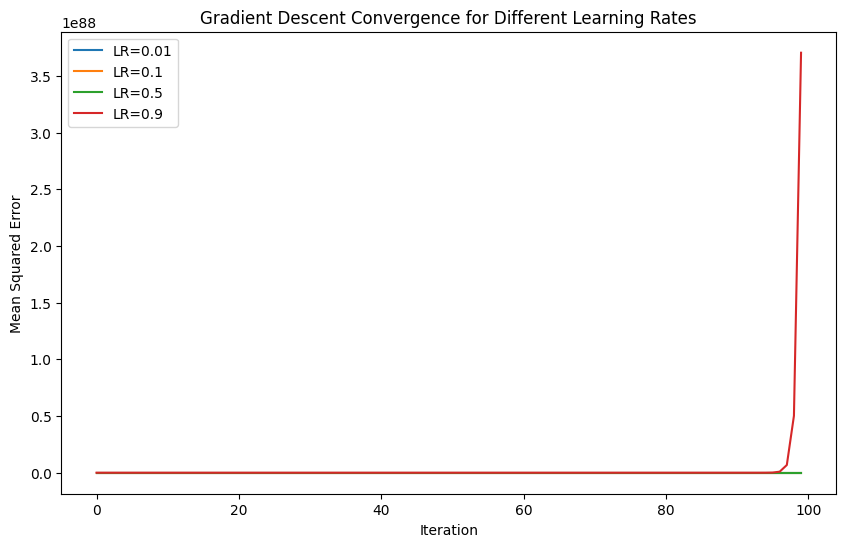

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for a simple linear regression problem
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term to the features
X_b = np.c_[np.ones((100, 1)), X]

# Function to perform gradient descent
def gradient_descent(X, y, learning_rate, n_iterations):
    m = len(y)
    theta = np.random.randn(2, 1)
    error_history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        # Calculate and store the mean squared error for visualization
        mse = np.mean((X.dot(theta) - y)**2)
        error_history.append(mse)

    return theta, error_history

# Try different learning rates
learning_rates = [0.01, 0.1, 0.5, 0.9]

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    theta, error_history = gradient_descent(X_b, y, learning_rate=lr, n_iterations=100)
    plt.plot(error_history, label=f'LR={lr}')

plt.title('Gradient Descent Convergence for Different Learning Rates')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In this example, you can observe how different learning rates affect the convergence of the gradient descent algorithm. As the learning rate increases, you might notice that the algorithm diverges, and the mean squared error increases rather than decreases. This is a common issue when the learning rate is too large. It's crucial to choose an appropriate learning rate through experimentation to ensure convergence without overshooting or being too slow.

ANSWER3
The perceptron algorithm is designed to work well when the data is linearly separable, meaning that you can draw a line (or hyperplane in higher dimensions) to separate the classes. However, when the data is not linearly separable, the perceptron algorithm may not converge, and it won't find a solution that separates the classes perfectly.

Accuracy: 0.8


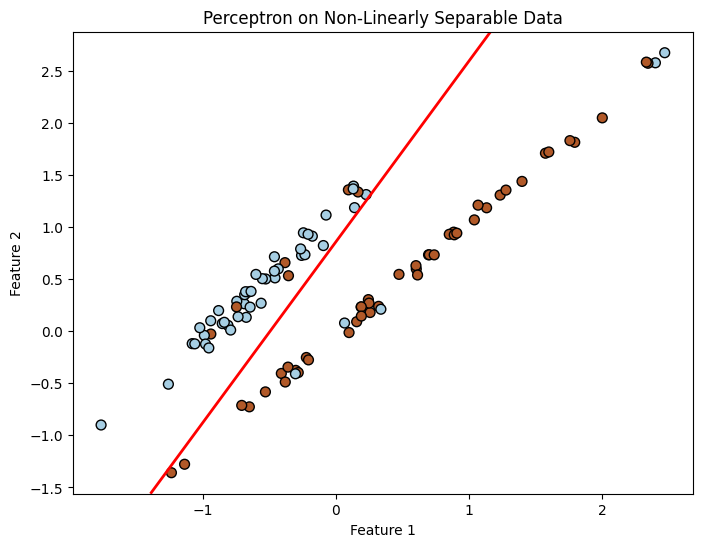

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a toy dataset that is not linearly separable
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=50)
plt.title("Perceptron on Non-Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = perceptron.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.show()


For datasets that are not linearly separable, more advanced algorithms like support vector machines (SVMs) or neural networks with hidden layers can be used to capture complex decision boundaries.

In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


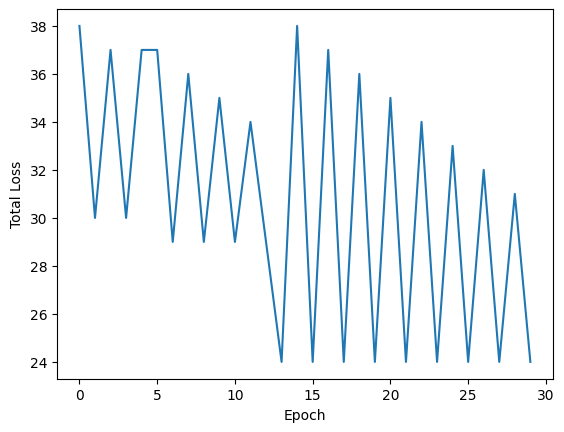

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.